# Task -1: Classifying Text into Counter and Non Counter Class

### This notebook is used to measure performance of the combination of different classifier and different feature engineering techniques  used in the project

In [57]:
import pandas as pd
import numpy as np
import json
from collections import Counter
from catboost import CatBoostClassifier
from xgboost.sklearn import XGBClassifier
import matplotlib.pyplot as plt
#from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.metrics import make_scorer, f1_score, accuracy_score, recall_score, precision_score, classification_report, precision_recall_fscore_support
import itertools
from string import punctuation
from gensim.parsing.preprocessing import STOPWORDS
#from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from collections import Counter
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import neighbors
from sklearn import ensemble
from sklearn import neural_network
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
ps = PorterStemmer()
from scipy.sparse import vstack, hstack
import pickle


### Word_to_vec model  loading 
1. change the path of glove model file
2. One the given function must load the model

In [38]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
import os
#GLOVE_MODEL_FILE_200 = "../../../LEAM-master/glove.twitter.27B/glove.twitter.27B.200d.txt"
GLOVE_MODEL_FILE="../../../glove.840B.300d.txt"
print(os.path.isfile(GLOVE_MODEL_FILE))

import numpy as np

## change the embedding dimension according to the model
EMBEDDING_DIM = 300
###change the method type
select_method=1

### method one
def loadGloveModel1(gloveFile):
    print("Loading Glove Model")
    f = open(gloveFile,'r', encoding='utf8')
    model = {}
    i=0
    for line in f:
        i=i+1
        splitLine = line.split(' ')
        word = splitLine[0]
        embedding = np.asarray(splitLine[1:], dtype='float32')
        model[word] = embedding
        if(i%10000==0):
            print("count"+str(i/10000))
    print("Done.",len(model)," words loaded!")
    return model


### method two
def loadGloveModel2(glove_file):
    tmp_file = get_tmpfile("test_crawl_200.txt")

    # call glove2word2vec script
    # default way (through CLI): python -m gensim.scripts.glove2word2vec --input <glove_file> --output <w2v_file>

    glove2word2vec(glove_file, tmp_file)
    model=KeyedVectors.load_word2vec_format(tmp_file)
    return model


if (select_method==1):
    word2vec_model = loadGloveModel1(GLOVE_MODEL_FILE)
elif (select_method==2):
    word2vec_model = loadGloveModel2(GLOVE_MODEL_FILE)
else:
    print("wrong method number selected")


True
Loading Glove Model
count1.0
count2.0
count3.0
count4.0
count5.0
count6.0
count7.0
count8.0
count9.0
count10.0
count11.0
count12.0
count13.0
count14.0
count15.0
count16.0
count17.0
count18.0
count19.0
count20.0
count21.0
count22.0
count23.0
count24.0
count25.0
count26.0
count27.0
count28.0
count29.0
count30.0
count31.0
count32.0
count33.0
count34.0
count35.0
count36.0
count37.0
count38.0
count39.0
count40.0
count41.0
count42.0
count43.0
count44.0
count45.0
count46.0
count47.0
count48.0
count49.0
count50.0
count51.0
count52.0
count53.0
count54.0
count55.0
count56.0
count57.0
count58.0
count59.0
count60.0
count61.0
count62.0
count63.0
count64.0
count65.0
count66.0
count67.0
count68.0
count69.0
count70.0
count71.0
count72.0
count73.0
count74.0
count75.0
count76.0
count77.0
count78.0
count79.0
count80.0
count81.0
count82.0
count83.0
count84.0
count85.0
count86.0
count87.0
count88.0
count89.0
count90.0
count91.0
count92.0
count93.0
count94.0
count95.0
count96.0
count97.0
count98.0
coun

#### This function will return the plot of the confusion matrix 
1. input: confusion matrix and target names(class_name)
2. output: plot of confusion matrix 

In [39]:
# file used to write preserve the results of the classfier
# confusion matrix and precision recall fscore matrix

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.tight_layout()
    return plt

#### This function is generating the classification report
1. input: ground_truth and predicted outputs
2. output: dataframe containing the results

In [40]:
##saving the classification report
def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    
    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='macro'))
    avg.append(accuracy_score(y_true, y_pred, normalize=True))
    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support','accuracy']
    list_all=list(metrics_summary)
    list_all.append(cm.diagonal())
    class_report_df = pd.DataFrame(
        list_all,
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-2] = total

    class_report_df['avg / total'] = avg

    return class_report_df.T

## Dataset is loaded here

In [41]:
### change the path where the data is kept
path='../Data/Counterspeech_Dataset.json'
with open(path) as fp:
    train_data = json.load(fp)

In [42]:
def convert_class_label(input_text):
    if input_text:
        return 'counter'
    else:
        return 'noncounter'

In [43]:
pd_train = pd.DataFrame(columns=['id','class','community','category','text'])

for count, each in enumerate(train_data):
    try:
        pd_train.loc[count]  = [each['id'], convert_class_label(each['CounterSpeech']), each['Community'],each['Category'],each['commentText']]
    except:
        pass
print('Training Data Loading Completed...')

Training Data Loading Completed...


In [44]:
from commen_preprocess import *

In [45]:
pd_train['text'].replace('', np.nan, inplace=True)
pd_train.dropna(subset=['text'], inplace=True)

### Google Universal Sentence Encoder configuration
###### prerequisite: tensorflow version >=1.7

In [46]:
import tensorflow as tf
import tensorflow_hub as hub
module_url = "https://tfhub.dev/google/universal-sentence-encoder/2" #@param ["https://tfhub.dev/google/universal-sentence-encoder/2", "https://tfhub.dev/google/universal-sentence-encoder-large/3"]
embed = hub.Module(module_url)
config = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=12,
                       allow_soft_placement=True, device_count = {'CPU': 12})

def get_embeddings(messages):
      
    with tf.Session(config=config) as session:
            session.run([tf.global_variables_initializer(), tf.tables_initializer()])
            message_emb = session.run(embed(messages))
            
    print("ending")
    return np.array(message_emb)

INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_0:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_0


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_0:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_0


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_1:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_1


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_1:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_1


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_10:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_10


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_10:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_10


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_11:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_11


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_11:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_11


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_12:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_12


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_12:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_12


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_13:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_13


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_13:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_13


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_14:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_14


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_14:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_14


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_15:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_15


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_15:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_15


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_16:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_16


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_16:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_16


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_2:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_2


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_2:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_2


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_3:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_3


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_3:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_3


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_4:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_4


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_4:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_4


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_5:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_5


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_5:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_5


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_6:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_6


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_6:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_6


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_7:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_7


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_7:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_7


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_8:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_8


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_8:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_8


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_9:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_9


INFO:tensorflow:Initialize variable module_1/Embeddings_en/sharded_9:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Embeddings_en/sharded_9


INFO:tensorflow:Initialize variable module_1/Encoder_en/DNN/ResidualHidden_0/weights:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Encoder_en/DNN/ResidualHidden_0/weights


INFO:tensorflow:Initialize variable module_1/Encoder_en/DNN/ResidualHidden_0/weights:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Encoder_en/DNN/ResidualHidden_0/weights


INFO:tensorflow:Initialize variable module_1/Encoder_en/DNN/ResidualHidden_1/weights:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Encoder_en/DNN/ResidualHidden_1/weights


INFO:tensorflow:Initialize variable module_1/Encoder_en/DNN/ResidualHidden_1/weights:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Encoder_en/DNN/ResidualHidden_1/weights


INFO:tensorflow:Initialize variable module_1/Encoder_en/DNN/ResidualHidden_2/weights:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Encoder_en/DNN/ResidualHidden_2/weights


INFO:tensorflow:Initialize variable module_1/Encoder_en/DNN/ResidualHidden_2/weights:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Encoder_en/DNN/ResidualHidden_2/weights


INFO:tensorflow:Initialize variable module_1/Encoder_en/DNN/ResidualHidden_3/projection:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Encoder_en/DNN/ResidualHidden_3/projection


INFO:tensorflow:Initialize variable module_1/Encoder_en/DNN/ResidualHidden_3/projection:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Encoder_en/DNN/ResidualHidden_3/projection


INFO:tensorflow:Initialize variable module_1/Encoder_en/DNN/ResidualHidden_3/weights:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Encoder_en/DNN/ResidualHidden_3/weights


INFO:tensorflow:Initialize variable module_1/Encoder_en/DNN/ResidualHidden_3/weights:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with Encoder_en/DNN/ResidualHidden_3/weights


INFO:tensorflow:Initialize variable module_1/SHARED_RANK_ANSWER/response_encoder_0/tanh_layer_0/bias:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with SHARED_RANK_ANSWER/response_encoder_0/tanh_layer_0/bias


INFO:tensorflow:Initialize variable module_1/SHARED_RANK_ANSWER/response_encoder_0/tanh_layer_0/bias:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with SHARED_RANK_ANSWER/response_encoder_0/tanh_layer_0/bias


INFO:tensorflow:Initialize variable module_1/SHARED_RANK_ANSWER/response_encoder_0/tanh_layer_0/weights:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with SHARED_RANK_ANSWER/response_encoder_0/tanh_layer_0/weights


INFO:tensorflow:Initialize variable module_1/SHARED_RANK_ANSWER/response_encoder_0/tanh_layer_0/weights:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with SHARED_RANK_ANSWER/response_encoder_0/tanh_layer_0/weights


INFO:tensorflow:Initialize variable module_1/SHARED_RANK_ANSWER/response_encoder_0/tanh_layer_1/bias:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with SHARED_RANK_ANSWER/response_encoder_0/tanh_layer_1/bias


INFO:tensorflow:Initialize variable module_1/SHARED_RANK_ANSWER/response_encoder_0/tanh_layer_1/bias:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with SHARED_RANK_ANSWER/response_encoder_0/tanh_layer_1/bias


INFO:tensorflow:Initialize variable module_1/SHARED_RANK_ANSWER/response_encoder_0/tanh_layer_1/weights:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with SHARED_RANK_ANSWER/response_encoder_0/tanh_layer_1/weights


INFO:tensorflow:Initialize variable module_1/SHARED_RANK_ANSWER/response_encoder_0/tanh_layer_1/weights:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with SHARED_RANK_ANSWER/response_encoder_0/tanh_layer_1/weights


INFO:tensorflow:Initialize variable module_1/SHARED_RANK_ANSWER/response_encoder_0/tanh_layer_2/bias:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with SHARED_RANK_ANSWER/response_encoder_0/tanh_layer_2/bias


INFO:tensorflow:Initialize variable module_1/SHARED_RANK_ANSWER/response_encoder_0/tanh_layer_2/bias:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with SHARED_RANK_ANSWER/response_encoder_0/tanh_layer_2/bias


INFO:tensorflow:Initialize variable module_1/SHARED_RANK_ANSWER/response_encoder_0/tanh_layer_2/weights:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with SHARED_RANK_ANSWER/response_encoder_0/tanh_layer_2/weights


INFO:tensorflow:Initialize variable module_1/SHARED_RANK_ANSWER/response_encoder_0/tanh_layer_2/weights:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with SHARED_RANK_ANSWER/response_encoder_0/tanh_layer_2/weights


INFO:tensorflow:Initialize variable module_1/SNLI/Classifier/LinearLayer/bias:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with SNLI/Classifier/LinearLayer/bias


INFO:tensorflow:Initialize variable module_1/SNLI/Classifier/LinearLayer/bias:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with SNLI/Classifier/LinearLayer/bias


INFO:tensorflow:Initialize variable module_1/SNLI/Classifier/LinearLayer/weights:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with SNLI/Classifier/LinearLayer/weights


INFO:tensorflow:Initialize variable module_1/SNLI/Classifier/LinearLayer/weights:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with SNLI/Classifier/LinearLayer/weights


INFO:tensorflow:Initialize variable module_1/SNLI/Classifier/tanh_layer_0/bias:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with SNLI/Classifier/tanh_layer_0/bias


INFO:tensorflow:Initialize variable module_1/SNLI/Classifier/tanh_layer_0/bias:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with SNLI/Classifier/tanh_layer_0/bias


INFO:tensorflow:Initialize variable module_1/SNLI/Classifier/tanh_layer_0/weights:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with SNLI/Classifier/tanh_layer_0/weights


INFO:tensorflow:Initialize variable module_1/SNLI/Classifier/tanh_layer_0/weights:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with SNLI/Classifier/tanh_layer_0/weights


INFO:tensorflow:Initialize variable module_1/global_step:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with global_step


INFO:tensorflow:Initialize variable module_1/global_step:0 from checkpoint b'/tmp/tfhub_modules/1fb57c3ffe1a38479233ee9853ddd7a8ac8a8c47/variables/variables' with global_step


In [47]:
#### converting the data into text and labels dictionary
def get_data():
    comments=pd_train['text'].values
    labels=pd_train['class'].values
    list_comment=[]
    for comment,label in zip(comments,labels):
        temp={}
        temp['text']=comment
        temp['label']=label
        list_comment.append(temp)
    return list_comment    

#### Different type of tokenization that can be performed

In [48]:
### stopwords and punctuations are not removed but text is cleaned and stemmed
def glove_tokenize_norem(text):
    #text = tokenizer(text)
    text=clean(text, remove_stopwords=False, remove_punctuations=False)
    words = text.split()
    words =[ps.stem(word) for word in words]
    return words

####stopwords and punctuations are removed along with that text is cleaned ans stemmed
def glove_tokenize(text):
    #text = tokenizer(text)
    text=clean(text, remove_stopwords=False, remove_punctuations=False)
    text = ''.join([c for c in text if c not in punctuation])
    words = text.split()
    words = [word for word in words if word not in STOPWORDS]
    words =[ps.stem(word) for word in words]
    return words

### this is the glove tokenize for embedding
def glove_tokenize_embed(text):
    #text = tokenizer(text)
    text=clean(text, remove_stopwords=False, remove_punctuations=False)
    text = ''.join([c for c in text if c not in punctuation])
    words = text.split()
    words = [word for word in words if word not in STOPWORDS]
    return words



### Different feature generation methods


In [53]:
TOKENIZER = glove_tokenize
#google encoding used where text is cleaned  
def gen_data_google():
    comments = get_data()
    X, y = [], []
    for comment in comments:
        y.append(comment['label'])
        #X.append(tokenizer(comment['text']))
        X.append(clean(comment['text'], remove_stopwords=True, remove_punctuations=True))
    
    X =get_embeddings(X)
    return X, y

#google encoding used where text is not cleaned 
def gen_data_google2():
    comments = get_data()
    X, X1, y = [],[],[]
    for comment in comments:
        y.append(comment['label'])
        X.append(clean(comment['text'], remove_stopwords=False, remove_punctuations=False))
    #Word Level Features
    X =get_embeddings(X)
    return X,y

### tfidf feature generation was used here where stopwords and punctuations are removed 
def gen_data_new_tfidf():
    comments = get_data()
    X, y = [], []
    for comment in comments:
        y.append(comment['label'])
        X.append(comment['text'])


    #Word Level Features
    word_vectorizer = TfidfVectorizer(sublinear_tf=False, ngram_range=(1,3),
                min_df=1, 
                strip_accents='unicode',
                #smooth_idf=1,
                analyzer='word', 
                stop_words='english',
                tokenizer=TOKENIZER,             
                max_features=500)
    
    
    #charlevel features new
    char_vectorizer = TfidfVectorizer(
    sublinear_tf=False,
    strip_accents='unicode',
    analyzer='char',
    #stop_words='english',
    ngram_range=(2, 6),
    max_features=500)
    word_vectorizer.fit(X)
    char_vectorizer.fit(X)
    test_word_features = word_vectorizer.transform(X)
    test_char_features = char_vectorizer.transform(X)
    X = list(hstack([test_char_features, test_word_features]).toarray())
    return X, y

### tfidf feature generation was used here where stopwords and punctuations are not removed 
def gen_data_new_tfidf2():
    comments = get_data()
    X, y = [], []
    for comment in comments:
        y.append(comment['label'])
        X.append(comment['text'])


    #Word Level Features
    word_vectorizer = TfidfVectorizer(sublinear_tf=False,ngram_range=(1,3),
                min_df=1, 
                strip_accents='unicode',
                #smooth_idf=1,
                analyzer='word', 
                #stop_words='english',
                tokenizer=glove_tokenize_norem,             
                max_features=500)
    
    
    #charlevel features new
    char_vectorizer = TfidfVectorizer(
    sublinear_tf=False,
    strip_accents='unicode',
    analyzer='char',
    #stop_words='english',
    ngram_range=(2, 6),
    max_features=500)
    
    word_vectorizer.fit(X)
    char_vectorizer.fit(X)
    test_word_features = word_vectorizer.transform(X)
    test_char_features = char_vectorizer.transform(X)
    X = list(hstack([test_char_features, test_word_features]).toarray())
    
    return X, y

def gen_data_embed():
    comments = get_data()
    X, y = [], []
    for comment in comments:
        words = glove_tokenize_embed(comment['text'].lower())
        emb = np.zeros(EMBEDDING_DIM)
        for word in words:
            try:
                emb += word2vec_model[word]
            except:
                pass
        if(len(words)>0):
            emb /= len(words)
            
        X.append(emb)
        y.append(comment['label'])

    return X, y


## combination of not cleaned google encodings and tfidf features where stopwords and punctuations are not removed 
def combine_tf_google_rem():
    X,_=gen_data_google()
    X1,y=gen_data_new_tfidf()
    X=np.concatenate((np.array(X), np.array(X1)), axis=1)
    return X,y

## combination of cleaned google encodings and tfidf features where stopwords and punctuations are ssremoved 
def combine_tf_google_norem():
    X,_=gen_data_google2()
    X1,y=gen_data_new_tfidf2()
    X=np.concatenate((np.array(X), np.array(X1)), axis=1)
    return X,y
## combination of google encodings where stopwords and punctuation are kept and tfidf features where stopwords and punctuations are removed 
def combine_tf_rem_google_norem():
    X,_=gen_data_google2() 
    X1,y=gen_data_new_tfidf()
    X=np.concatenate((np.array(X), np.array(X1)), axis=1)
    return X,y
## combination of google encodings where stopwords and punctuation are removed and tfidf features where stopwords and punctuations are kept 
def combine_tf_norem_google_rem():
    X,_=gen_data_google()
    X1,y=gen_data_new_tfidf2()
    X=np.concatenate((np.array(X), np.array(X1)), axis=1)
    return X,y

## combination of google encodings where stopwords and punctuation are removed and average word embeddings  
def combine_google_rem_embed():
    X,_=gen_data_google()
    X1,y=gen_data_embed()
    X=np.concatenate((np.array(X), np.array(X1)), axis=1)
    return X,y
## combination of tfidf features where stopwords and punctuation are removed and average word embeddings  
def combine_tf_rem_embed():
    X,_=gen_data_new_tfidf()
    X1,y=gen_data_embed()
    X=np.concatenate((np.array(X), np.array(X1)), axis=1)
    return X,y

####combination of three
def combine_tf_rem_google_norem_embed():
    X,_=gen_data_google2()
    X1,y=gen_data_new_tfidf()
    X2,_=gen_data_embed()
    X=np.concatenate((np.array(X), np.array(X1),np.array(X2)), axis=1)
    return X,y

def combine_tf_rem_google_rem_embed():
    X,_=gen_data_google()
    X1,y=gen_data_new_tfidf()
    X2,_=gen_data_embed()
    X=np.concatenate((np.array(X), np.array(X1),np.array(X2)), axis=1)
    return X,y




###old tfidf

def gen_data_old_tfidf():
    comments = get_data()
    X, y = [], []
    for comment in comments:
        y.append(comment['label'])
        X.append(comment['text'])
    with open('../tfidf_word_vectorizer.pk', 'rb') as fin:
        word_vectorizer = pickle.load(fin)

    with open('../tfidf_char_vectorizer.pk', 'rb') as fin:
        char_vectorizer = pickle.load(fin)


    
    word_vectorizer.fit(X)
    char_vectorizer.fit(X)
    
    test_word_features = word_vectorizer.transform(X)
    test_char_features = char_vectorizer.transform(X)
    X = list(hstack([test_char_features, test_word_features]).toarray())
    
    return X, y


## Model selection and feature selection 

In [54]:
def get_model(m_type=None):
    if not m_type:
        print("ERROR: Please specify a model type!")
        return None
    if m_type == 'decision_tree_classifier':
        logreg = tree.DecisionTreeClassifier(class_weight='balanced')
    elif m_type == 'MLPClassifier':
        logreg = neural_network.MLPClassifier((500))
    elif m_type == 'KNeighborsClassifier':
        logreg = neighbors.KNeighborsClassifier(n_neighbors = 10)
    elif m_type == 'ExtraTreeClassifier':
        logreg = tree.ExtraTreeClassifier()
    elif m_type == 'ExtraTreeClassifier_2':
        logreg = ensemble.ExtraTreesClassifier()
    elif m_type == 'RandomForestClassifier':
        logreg = ensemble.RandomForestClassifier(class_weight='balanced')
    elif m_type == 'Logistic_Regression':
        logreg = OneVsRestClassifier(linear_model.LogisticRegression(class_weight='balanced'))
    elif m_type == 'SVC':
        logreg = SVC(class_weight='balanced');
    elif m_type == 'Catboost':
        logreg = CatBoostClassifier(iterations=100,scale_pos_weight=(4048/5335))
    elif m_type == 'XGB_classifier':
        logreg=XGBClassifier(scale_pos_weight=(4048/5335),n_estimators=500,nthread=12)
    elif m_type == 'Gaussian_NB':
        logreg = GaussianNB()
    else:
        print("give correct model")
    return logreg

def get_feature(f_type=None):
    if not f_type:
        print("ERROR: Please specify a model type!")
        return None,None
    if f_type == 'google_not_preprocess':
        X,y=gen_data_google2()
    elif f_type == 'word_to_vec_embed':
        X,y=gen_data_embed()
    elif f_type == 'google_preprocess':
        X,y=gen_data_google()
    elif f_type == 'tfidf_not_preprocess':
        X,y=gen_data_new_tfidf2()
    elif f_type == 'tfidf_preprocess':
        X,y=gen_data_new_tfidf()
    elif f_type == 'google_preprocess_tfidf_preprocess':
        X,y=combine_tf_google_rem()
    elif f_type == 'google_nopreprocess_tfidf_nopreprocess':
        X,y=combine_tf_google_norem()
    elif f_type == 'google_preprocess_tfidf_nopreprocess':
        X,y=combine_tf_norem_google_rem()
    elif f_type == 'google_nopreprocess_tfidf_preprocess':
        X,y=combine_tf_rem_google_norem()
    elif f_type == 'google_preprocess_embed':
        X,y=combine_google_rem_embed()
    elif f_type == 'tfidf_preprocess_embed':
        X,y=combine_tf_rem_embed()
    elif f_type == 'google_preprocess_tfidf_preprocess_embed':
        ###best features####
        X,y=combine_tf_rem_google_rem_embed()
    else:
        print("give correct feature selection")    
    return X,y




In [2]:
import json
with open('binary_all_parameters.json') as f:
        parameters=json.load(f)


In [59]:
def classification_model(classifier_model,feature_model,img_name,report_name):
    X,y=get_feature(f_type=feature_model)
    model=get_model(m_type=classifier_model)
    if(model==None):
        return 1
    try:
        model_parameter=parameters[classifier_model+'+'feature_model]
        for k,v in param_set.items():
            setattr(model_parameter,k,v)
    except:
        pass
    
    Classifier_Train_X = np.array(X, copy=False)
    Classifier_Train_Y = y
    label_map = {
            'counter': 0,
            'noncounter': 1
        }
    temp=[]
    for data in Classifier_Train_Y:
            temp.append(label_map[data])

    Classifier_Train_Y=np.array(temp)
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=10)
    y_total_preds=[] 
    y_total=[]
    count=0

    for train_index, test_index in kf.split(Classifier_Train_X,Classifier_Train_Y):
        print('cv_fold',count)
        X_train, X_test = Classifier_Train_X[train_index], Classifier_Train_X[test_index]
        y_train, y_test = Classifier_Train_Y[train_index], Classifier_Train_Y[test_index]
        classifier=model 
        classifier.fit(X_train,y_train)
        y_preds = classifier.predict(X_test)
        for ele in y_test:
            y_total.append(ele)
        for ele in y_preds:
            y_total_preds.append(ele)
        y_pred_train = classifier.predict(X_train)
        count=count+1       
        print('accuracy_train:',accuracy_score(y_train, y_pred_train),'accuracy_test:',accuracy_score(y_test, y_preds))

    report = classification_report( y_total, y_total_preds )
    cm=confusion_matrix(y_total, y_total_preds)
    plt=plot_confusion_matrix(cm,normalize= True,target_names = ['counter','non_counter'],title = "Confusion Matrix")
    plt.savefig(img_name)
    print(report)
    df_result=pandas_classification_report(y_total,y_total_preds)
    df_result.to_csv(report_name,  sep=',')
    with open('all_preds_binary.pkl', 'wb') as f:
          pickle.dump([y_total,y_total_preds], f)



## Models available
1. decision_tree_classifier
2. MLPClassifier
3. KNeighborsClassifier
4. ExtraTreeClassifier
5. ExtraTreeClassifier_2
6. RandomForestClassifier
7. SVC
8. Catboost
9. XGB_classifier
10. Logistic Regression
11. Gaussian Naive bayes

## Feature Models available
1. google_not_preprocess
2. word_to_vec_embed
3. google_preprocess
4. tfidf_not_preprocess
5. tfidf_preprocess
6. google_preprocess_tfidf_preprocess
7. google_nopreprocess_tfidf_nopreprocess
8. google_preprocess_tfidf_nopreprocess
9. google_nopreprocess_tfidf_preprocess
10. google_preprocess_embed
11. tfidf_preprocess_embed
12. google_preprocess_tfidf_preprocess_embed


### Specify the model and the feature selection method

ending
cv_fold 0
accuracy_train: 0.9994112105511069 accuracy_test: 0.7298728813559322
cv_fold 1
accuracy_train: 0.9988224211022139 accuracy_test: 0.7510593220338984
cv_fold 2
accuracy_train: 0.9988224211022139 accuracy_test: 0.7341101694915254
cv_fold 3
accuracy_train: 0.9979981158737635 accuracy_test: 0.7478813559322034
cv_fold 4
accuracy_train: 0.9985869053226566 accuracy_test: 0.7489406779661016
cv_fold 5
accuracy_train: 0.9988224211022139 accuracy_test: 0.753177966101695
cv_fold 6
accuracy_train: 0.9992935358530555 accuracy_test: 0.7486744432661718
cv_fold 7
accuracy_train: 0.9990580478040739 accuracy_test: 0.7529162248144221
cv_fold 8
accuracy_train: 0.9994112798775462 accuracy_test: 0.7550371155885471
cv_fold 9
accuracy_train: 0.9992935358530555 accuracy_test: 0.5832449628844114
             precision    recall  f1-score   support

          0       0.70      0.67      0.68      4092
          1       0.76      0.77      0.77      5344

avg / total       0.73      0.73      0.73 

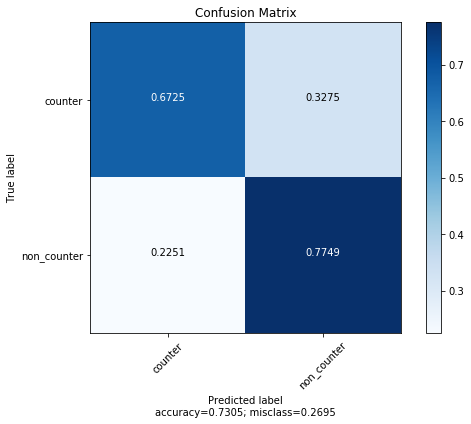

In [60]:
###specify the model name
clf_model='MLPClassifier'
###specify the feature model###
ft_model='google_preprocess_tfidf_preprocess_embed'
###image_name###
im=clf_model+ft_model+'_cm.png'
###report_name###
re=clf_model+ft_model+'_report.csv'

###actual classfier call
classification_model(classifier_model=clf_model,feature_model=ft_model,img_name=im,report_name=re)
